In [ ]:
pip install -q mediapipe


In [ ]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite


In [ ]:
import cv2
import numpy as np

In [ ]:
MARGIN=10
ROW_SIZE = 10
FONT_SIZE=1
FONT_THICKNESS=1
TEXT_COLOR = (255,0,0)

In [ ]:
def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded['bon.jpg']
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
   IMAGE_FILE = next(iter(uploaded))
   print('Uploaded file:', IMAGE_FILE)

Saving bon.jpg to bon.jpg
Uploaded file: bon.jpg


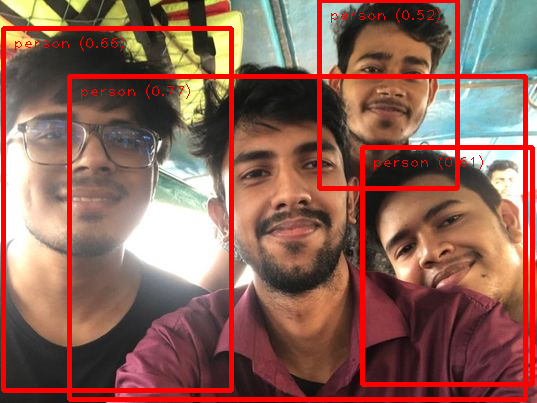

In [ ]:

import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

image = mp.Image.create_from_file(IMAGE_FILE)


detection_result = detector.detect(image)

image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)